In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

SIZE = 10
SMALL_SIZE = 9
LEGEND_SIZE = 7

mpl.rcdefaults()
mpl.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{amsmath,bm,times}'],
    'font.family': 'Times New Roman',
    'font.size': SIZE,
    'axes.titlesize': SIZE,
    'axes.labelsize': SMALL_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE,
    'figure.titlesize': SIZE
})

model_fmt = {
    'bert-base-cased': r'BERT',
    'roberta-large': r'RoBERTa'
}

colors = [
    "#8692c6",
    "#cba058",
    "#ae4388",
    "#92921c",
    "#3c8575"
]

# Dataset Size

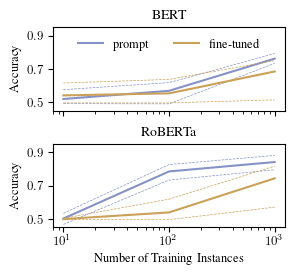

In [16]:
df = pd.read_csv('dataset_size.csv', na_values='-')
ftune = pd.read_csv('finetune.csv', na_values='-')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3.0, 2.6), sharex=True)

x_values = np.array([10, 100, 1000])
for j, model in enumerate(['bert-base-cased', 'roberta-large']):
    avg = np.zeros_like(x_values, dtype=np.float32)
    min_ = np.zeros_like(x_values, dtype=np.float32)
    max_ = np.zeros_like(x_values, dtype=np.float32)
    
    favg = np.zeros_like(x_values, dtype=np.float32)
    fmin_ = np.zeros_like(x_values, dtype=np.float32)
    fmax_ = np.zeros_like(x_values, dtype=np.float32)
    for i, x in enumerate(x_values):
        condition1 = df.Model == model
        condition2 = df.Limit == x
        index = condition1 & condition2
        subset = df[index]
        avg[i] = subset.Acc.mean()
        min_[i] = subset.Acc.min()
        max_[i] = subset.Acc.max()
        
        condition1 = ftune.Model == model
        condition2 = ftune.Limit == x
        index = condition1 & condition2
        ftune_subset = ftune[index]
        favg[i] = ftune_subset.Acc.mean()
        fmin_[i] = ftune_subset.Acc.min()
        fmax_[i] = ftune_subset.Acc.max()
        
    axes[j].plot(x_values, avg,  c=colors[0], label='prompt')
    axes[j].plot(x_values, min_, c=colors[0], ls='--', lw=0.5)
    axes[j].plot(x_values, max_, c=colors[0], ls='--', lw=0.5)

    axes[j].plot(x_values, favg, c=colors[1], label='fine-tuned')
    axes[j].plot(x_values, fmin_, c=colors[1], ls='--', lw=0.5)
    axes[j].plot(x_values, fmax_, c=colors[1], ls='--', lw=0.5)


    axes[j].set_title(model_fmt[model])
    axes[j].set_xscale('log')
    axes[j].set_ylabel('Accuracy')

axes[0].set_ylim(0.45, 0.95)
axes[0].set_yticks([0.5, 0.7, 0.9])
axes[1].set_ylim(0.45, 0.95)
axes[1].set_yticks([0.5, .70, 0.90])
axes[1].set_xlabel('Number of Training Instances')
axes[0].legend(loc='upper center', ncol=2, frameon=False)

fig.subplots_adjust(hspace=0.4)
plt.savefig('sst2_training_size.pdf', bbox_inches='tight')

# Effect of Label Set Size

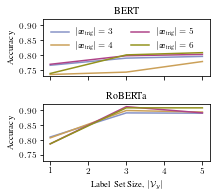

In [5]:
df = pd.read_csv('sst2_results.csv', na_values='-')
df = df[df['Candidates'] == 100]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3.0, 2.6), sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
x_values = np.array([1, 3, 5])

for j, model in enumerate(['bert-base-cased', 'roberta-large']):
    for k, n_trig in enumerate([3,4,5,6]):
        cond1 = df.Model == model
        cond2 = df.Triggers == n_trig
        index = cond1 & cond2
        subset = df[index]
        axes[j].plot(subset.Labels, subset.Acc/100, c=colors[k], label=r"$|\bm{x}_{\textrm{trig}}|=" + str(n_trig) + "$" )
    axes[j].set_title(model_fmt[model])
    axes[j].set_ylabel('Accuracy')

axes[0].set_ylim(0.73, 0.92)
axes[0].set_yticks([0.75, 0.8, 0.85, 0.90])
axes[1].set_ylim(0.73, 0.92)
axes[1].set_yticks([0.75, 0.8, 0.85, 0.90])
axes[0].legend(ncol=2, frameon=False)
axes[1].set_xlabel(r'Label Set Size, $|\mathcal{V}_{y}|$');

plt.savefig('sst2_label_set.pdf', bbox_inches='tight')

# Combined Plot

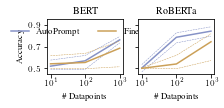

In [2]:
df = pd.read_csv('dataset_size.csv', na_values='-')
ftune = pd.read_csv('finetune.csv', na_values='-')
df_sicke = pd.read_csv('dataset_size_sicke.csv', na_values='-')
ftune_sicke = pd.read_csv('finetune_sicke.csv', na_values='-')



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(3.0, 1.0), sharey=True)

x_values = np.array([10, 100, 1000])
for j, model in enumerate(['bert-base-cased', 'roberta-large']):
    avg = np.zeros_like(x_values, dtype=np.float32)
    min_ = np.zeros_like(x_values, dtype=np.float32)
    max_ = np.zeros_like(x_values, dtype=np.float32)
    
    favg = np.zeros_like(x_values, dtype=np.float32)
    fmin_ = np.zeros_like(x_values, dtype=np.float32)
    fmax_ = np.zeros_like(x_values, dtype=np.float32)
    for i, x in enumerate(x_values):
        condition1 = df.Model == model
        condition2 = df.Limit == x
        index = condition1 & condition2
        subset = df[index]
        avg[i] = subset.Acc.mean()
        min_[i] = subset.Acc.min()
        max_[i] = subset.Acc.max()
        
        condition1 = ftune.Model == model
        condition2 = ftune.Limit == x
        index = condition1 & condition2
        ftune_subset = ftune[index]
        favg[i] = ftune_subset.Acc.mean()
        fmin_[i] = ftune_subset.Acc.min()
        fmax_[i] = ftune_subset.Acc.max()
        
    axes[j].plot(x_values, avg,  c=colors[0], label='AutoPrompt')
    axes[j].plot(x_values, min_, c=colors[0], ls='--', lw=0.5)
    axes[j].plot(x_values, max_, c=colors[0], ls='--', lw=0.5)

    axes[j].plot(x_values, favg, c=colors[1], label='Finetuned')
    axes[j].plot(x_values, fmin_, c=colors[1], ls='--', lw=0.5)
    axes[j].plot(x_values, fmax_, c=colors[1], ls='--', lw=0.5)

    axes[j].set_title(model_fmt[model])
    axes[j].set_xscale('log')
    # axes[0, j].set_ylabel('Accuracy')

# for j, model in enumerate(['bert-base-cased', 'roberta-large']):
#     avg = np.zeros_like(x_values, dtype=np.float32)
#     min_ = np.zeros_like(x_values, dtype=np.float32)
#     max_ = np.zeros_like(x_values, dtype=np.float32)
    
#     favg = np.zeros_like(x_values, dtype=np.float32)
#     fmin_ = np.zeros_like(x_values, dtype=np.float32)
#     fmax_ = np.zeros_like(x_values, dtype=np.float32)
#     for i, x in enumerate(x_values):
#         condition1 = df_sicke.Model == model
#         condition2 = df_sicke.Limit == x
#         index = condition1 & condition2
#         subset = df_sicke[index]
#         avg[i] = subset.Acc.mean()
#         min_[i] = subset.Acc.min()
#         max_[i] = subset.Acc.max()
        
#         condition1 = ftune_sicke.Model == model
#         condition2 = ftune_sicke.Limit == x
#         index = condition1 & condition2
#         ftune_subset = ftune_sicke[index]
#         favg[i] = ftune_subset.Acc.mean()
#         fmin_[i] = ftune_subset.Acc.min()
#         fmax_[i] = ftune_subset.Acc.max()
        
#     axes[j+2].plot(x_values, avg,  c=colors[0], label='AutoPrompt')
#     axes[j+2].plot(x_values, min_, c=colors[0], ls='--', lw=0.5)
#     axes[j+2].plot(x_values, max_, c=colors[0], ls='--', lw=0.5)

#     axes[j+2].plot(x_values, favg, c=colors[1], label='Finetuned')
#     axes[j+2].plot(x_values, fmin_, c=colors[1], ls='--', lw=0.5)
#     axes[j+2].plot(x_values, fmax_, c=colors[1], ls='--', lw=0.5)


#     axes[j+2].set_title(model_fmt[model] + ' (SICK-E)')
#     axes[j+2].set_xscale('log')
    # axes[j+2].set_ylabel('Accuracy')
    
axes[0].set_ylim(0.45, 0.95)
axes[0].set_yticks([0.5, 0.7, 0.9])
axes[0].set_ylabel('Accuracy')

axes[0].set_xticks(x_values)
axes[0].set_xlabel('\# Datapoints')
axes[1].set_xticks(x_values)
axes[1].set_xlabel('\# Datapoints')


# axes[0, 1].set_ylim(0.45, 0.95)
# axes[0, 1].set_yticks([0.5, .70, 0.90])
# axes[2].set_ylim(0.25, 0.75)
# axes[2].set_yticks([0.3, 0.50, 0.7])
# axes[3].set_ylim(0.25, 0.75)
# axes[3].set_yticks([0.3, .50, 0.70])


# axes[3].set_xlabel('Number of Training Instances')
axes[0].legend(loc='upper center', ncol=2, frameon=False)

# fig.subplots_adjust(hspace=0.8)
plt.savefig('sst_training_size.pdf', bbox_inches='tight')

# Separate Stacked Plots

In [3]:
def plot_fct(ax, df, ftune, model):
    x_values = np.array([10, 100, 1000])
    
    avg = np.zeros_like(x_values, dtype=np.float32)
    min_ = np.zeros_like(x_values, dtype=np.float32)
    max_ = np.zeros_like(x_values, dtype=np.float32)
    
    favg = np.zeros_like(x_values, dtype=np.float32)
    fmin_ = np.zeros_like(x_values, dtype=np.float32)
    fmax_ = np.zeros_like(x_values, dtype=np.float32)
    
    for i, x in enumerate(x_values):
        condition1 = df.Model == model
        condition2 = df.Limit == x
        index = condition1 & condition2
        subset = df[index]
        avg[i] = subset.Acc.mean()
        min_[i] = subset.Acc.min()
        max_[i] = subset.Acc.max()
        
        condition1 = ftune.Model == model
        condition2 = ftune.Limit == x
        index = condition1 & condition2
        ftune_subset = ftune[index]
        favg[i] = ftune_subset.Acc.mean()
        fmin_[i] = ftune_subset.Acc.min()
        fmax_[i] = ftune_subset.Acc.max()
    
    ax.plot(x_values, avg,  c=colors[0], label='AutoPrompt')
    ax.plot(x_values, min_, c=colors[0], ls='--', lw=0.5)
    ax.plot(x_values, max_, c=colors[0], ls='--', lw=0.5)

    ax.plot(x_values, favg, c=colors[1], label='Finetuned')
    ax.plot(x_values, fmin_, c=colors[1], ls='--', lw=0.5)
    ax.plot(x_values, fmax_, c=colors[1], ls='--', lw=0.5)
    ax.set_xscale('log')
    ax.set_ylabel('Accuracy')

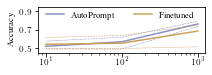

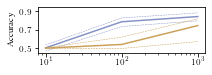

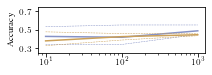

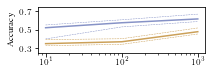

In [22]:
figsize = (3, 0.85)

fig, ax = plt.subplots(figsize=figsize)
plot_fct(ax, df, ftune, 'bert-base-cased')
# ax.tick_params(labelbottom=False)
ax.set_ylim(0.45, 0.95)
ax.set_yticks([0.5, 0.7, 0.9])
ax.legend(loc='lower left', bbox_to_anchor=(0.0, 0.55), ncol=2, frameon=False);
plt.savefig('sst2_bert_training_size.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=figsize)
plot_fct(ax, df, ftune, 'roberta-large')
# ax.tick_params(labelbottom=False)
ax.set_ylim(0.45, 0.95)
ax.set_yticks([0.5, 0.7, 0.9])
plt.savefig('sst2_roberta_training_size.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=figsize)
plot_fct(ax, df_sicke, ftune_sicke, 'bert-base-cased')
# ax.tick_params(labelbottom=False)
ax.set_ylim(0.25, 0.75)
ax.set_yticks([0.3, 0.5, 0.7])
plt.savefig('sicke_bert_training_size.pdf', bbox_inches='tight')

fig, ax = plt.subplots(figsize=figsize)
plot_fct(ax, df_sicke, ftune_sicke, 'roberta-large')
ax.set_ylim(0.25, 0.75)
ax.set_yticks([0.3, 0.5, 0.7])
plt.savefig('sicke_roberta_training_size.pdf', bbox_inches='tight')